# Deploy YOLOV8 With OpenVINO and Intel C3 Sapphire Rapids

### Export the Yolov8 model to OpenVINO format

In [10]:
import supervision as sv
import cv2
from ultralytics import YOLO
import os
import glob

In [3]:
# Load a YOLOv8n PyTorch model
model = YOLO('weights.pt')

In [20]:
# Export the model
model.export(format='openvino',imgsz=[640,640])  # creates 'yolov8n_openvino_model/'

Ultralytics YOLOv8.1.4 🚀 Python-3.9.2 torch-2.1.2+cu121 CPU (Intel Xeon Platinum 8481C 2.70GHz)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

PyTorch: starting from 'weights.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 5, 8400) (21.6 MB)

ONNX: starting export with onnx 1.15.0 opset 17...
ONNX: export success ✅ 0.8s, saved as 'weights.onnx' (42.6 MB)

OpenVINO: starting export with openvino 2023.2.0-13089-cfd42bd2cb0-HEAD...
OpenVINO: export success ✅ 0.2s, saved as 'weights_openvino_model/' (42.8 MB)

Export complete (2.6s)
Results saved to /home/ryan
Predict:         yolo predict task=detect model=weights_openvino_model imgsz=640  
Validate:        yolo val task=detect model=weights_openvino_model imgsz=640 data=/tmp/cache/dataset/data.yaml  
Visualize:       https://netron.app


'weights_openvino_model'

In [22]:
ov_model = YOLO('weights_openvino_model/')

WARNING ⚠️ Unable to automatically guess model task, assuming 'task=detect'. Explicitly define task for your model, i.e. 'task=detect', 'segment', 'classify','pose' or 'obb'.


### Run inference with Supervision annotations

In [ ]:
# Specify the folder path where your images are located
FOLDER_PATH = './home/images'

folder_path = FOLDER_PATH

# Define a list of image file extensions you want to consider
image_extensions = ["jpg", "jpeg", "png"]

# Use the glob module to find all files with the specified extensions in the folder
image_files = []
for extension in image_extensions:
    image_files.extend(glob.glob(os.path.join(folder_path, f"*.{extension}")))

# Now you have a list of image file paths in the 'image_files' variable
# You can loop through these files and perform any desired operations
for image_file in image_files:
    print(image_file)  # Replace this with your desired code


/home/ryan/river_data/192_168_0_105_2023_06_16__18_18_55_17cbde93.jpg

image 1/1 /home/ryan/river_data/192_168_0_105_2023_06_16__18_18_55_17cbde93.jpg: 640x640 1 plastic, 181.4ms
Speed: 2.3ms preprocess, 181.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)
supervision detectionsDetections(xyxy=array([[     1197.8,       955.5,      1483.5,      1155.8]], dtype=float32), mask=None, confidence=array([    0.92079], dtype=float32), class_id=array([0]), tracker_id=None)


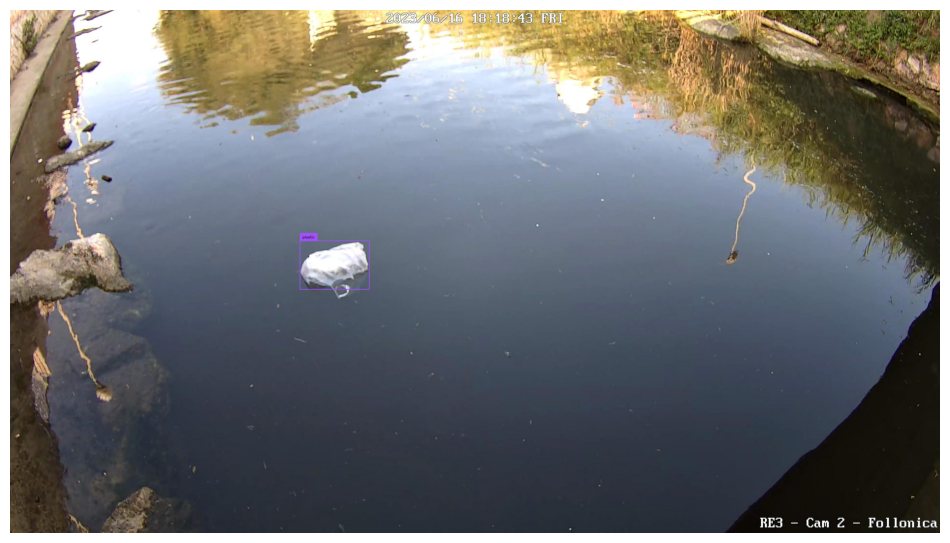

/home/ryan/river_data/192.168.0.100_2023_08_29__13_16_50_c0b9172d.jpg

image 1/1 /home/ryan/river_data/192.168.0.100_2023_08_29__13_16_50_c0b9172d.jpg: 640x640 1 plastic, 183.5ms
Speed: 2.2ms preprocess, 183.5ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)
supervision detectionsDetections(xyxy=array([[       2007,      1281.4,      2095.3,      1347.8]], dtype=float32), mask=None, confidence=array([    0.79182], dtype=float32), class_id=array([0]), tracker_id=None)


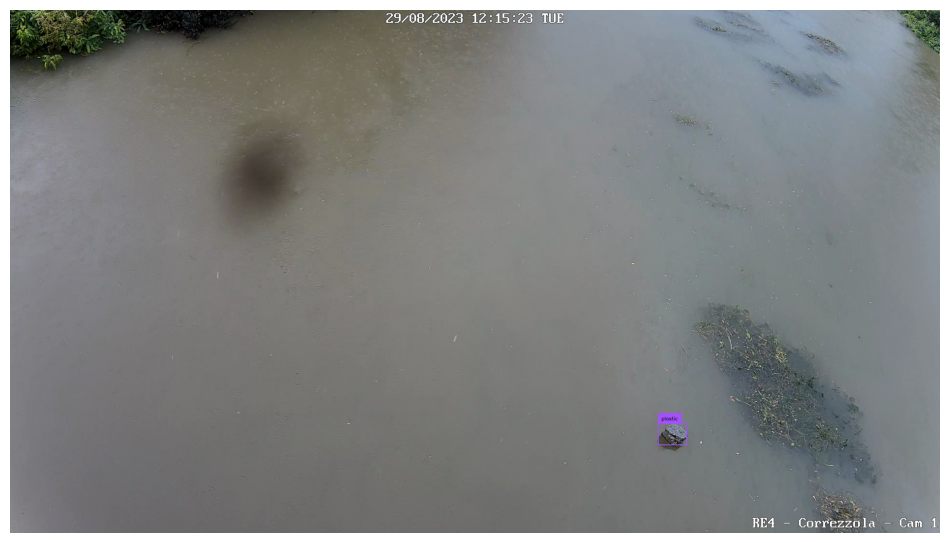

/home/ryan/river_data/192.168.0.100_2023_04_18__10_10_47_958f738d.jpg

image 1/1 /home/ryan/river_data/192.168.0.100_2023_04_18__10_10_47_958f738d.jpg: 640x640 1 plastic, 182.5ms
Speed: 2.1ms preprocess, 182.5ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)
supervision detectionsDetections(xyxy=array([[     816.07,      491.29,      883.57,       535.5]], dtype=float32), mask=None, confidence=array([    0.88404], dtype=float32), class_id=array([0]), tracker_id=None)


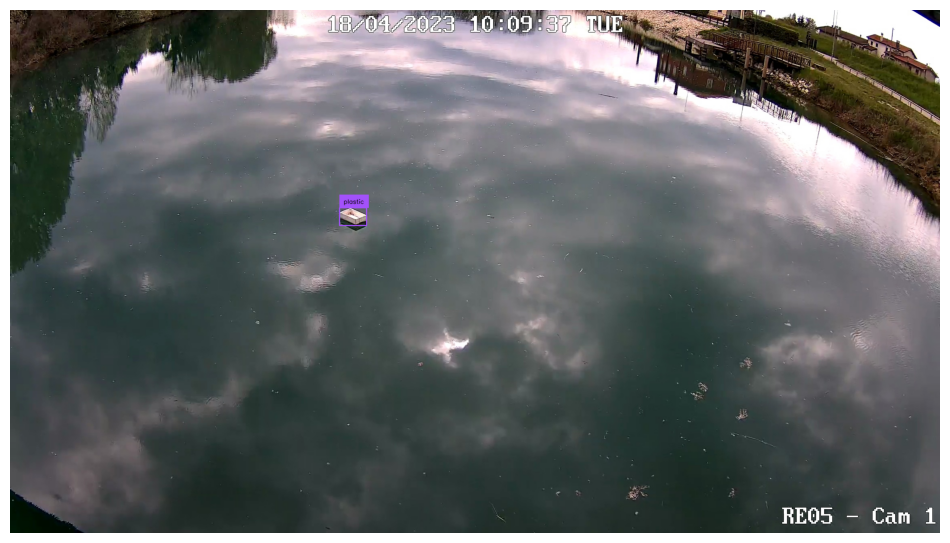

In [31]:
bounding_box_annotator = sv.BoundingBoxAnnotator()
label_annotator = sv.LabelAnnotator()

for image in image_files:
    print(image)
    results = ov_model(image)
    detections = sv.Detections.from_ultralytics(results[0])
    print(f'supervision detections{detections}')
    
    image = cv2.imread(image)

    labels = [
        model.model.names[class_id]
        for class_id
        in detections.class_id
    ]

    annotated_image = bounding_box_annotator.annotate(
        scene=image, detections=detections)
    annotated_image = label_annotator.annotate(
        scene=annotated_image, detections=detections, labels=labels)
    
    sv.plot_image(annotated_image)
        
    